In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [67]:
df = pd.read_csv("./data/master/master_apartaments_data_cleaned.csv", index_col = None, header=0)
print(df.sample(5))

                                     id      city               type  \
35907  ca3d1773114e75996f282e5ee4a79430   wroclaw       blockOfFlats   
23122  6a66cd0c07f8d9927cee8049a94fb093  warszawa       blockOfFlats   
46782  8b2c8c5976e87fc3d7396e82e368061d  warszawa  apartmentBuilding   
32866  4c529dd9c19107475e69f33399d67932    krakow       blockOfFlats   
11171  43cf88d88e540176a0b0845e15ee7086   wroclaw  apartmentBuilding   

       squareMeters  rooms  floor  floorCount  buildYear   latitude  \
35907          56.0    2.0    1.0         3.0     2012.0  51.053800   
23122          55.0    2.0    9.0         9.0     2002.0  52.143271   
46782          45.0    2.0    7.0         8.0     2010.0  52.233787   
32866          30.0    2.0    3.0         3.0       -1.0  50.073170   
11171          36.5    2.0    1.0         5.0     2018.0  51.099862   

       longitude  ...  buildingMaterial  condition  hasParkingSpace  \
35907  17.060700  ...           Unknown    Unknown              yes  

Text(0.5, 0, 'Price (PLN)')

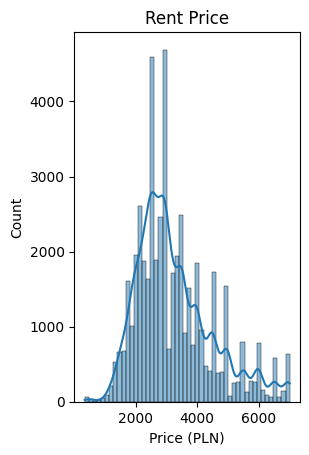

In [68]:
plt.subplot(1,2,1)
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Rent Price')
plt.xlabel("Price (PLN)")

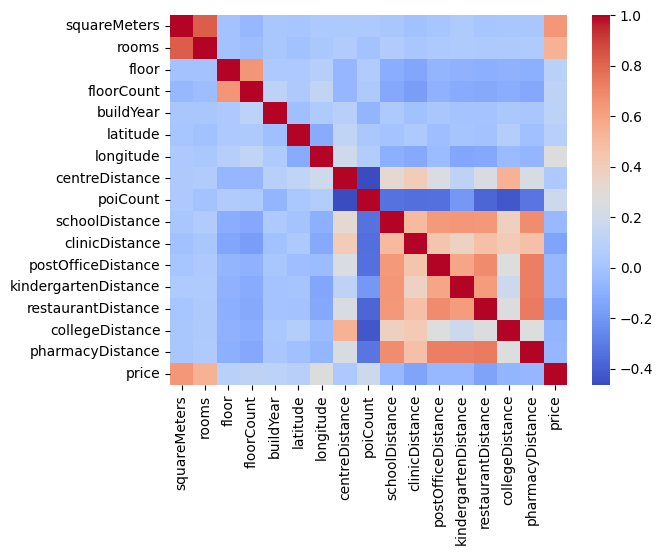

price           1.000000
squareMeters    0.643850
rooms           0.542233
longitude       0.269222
poiCount        0.181997
floorCount      0.110004
Name: price, dtype: float64


In [69]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

print(correlation_matrix['price'].sort_values(ascending=False).head(6))


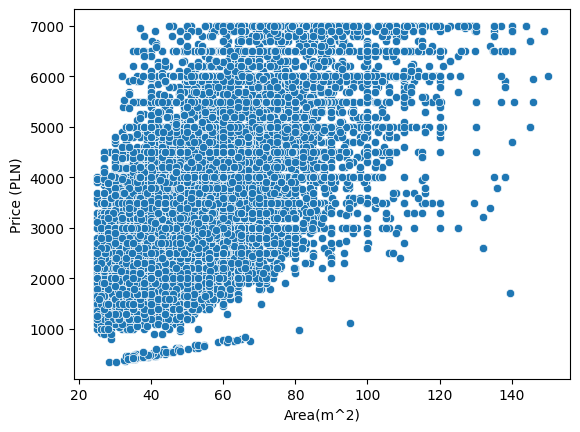

In [70]:
sns.scatterplot(x='squareMeters', y='price', data=df)
plt.xlabel("Area(m^2)")
plt.ylabel("Price (PLN)")
plt.show()

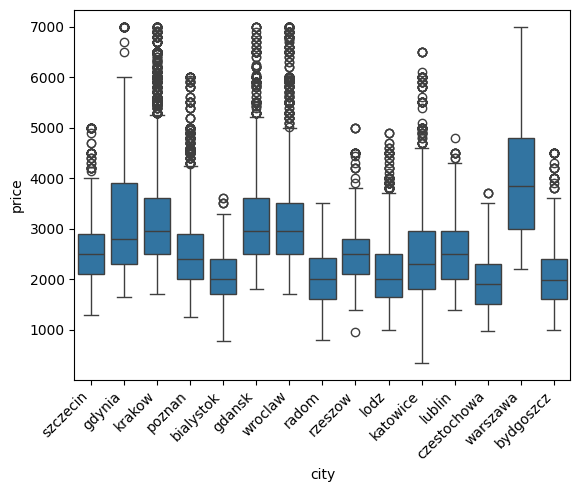

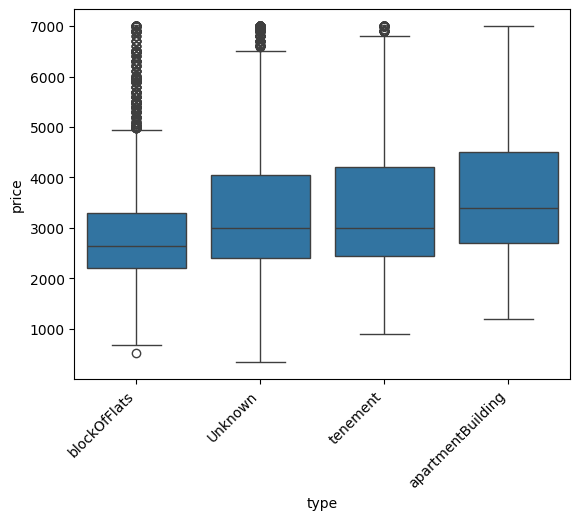

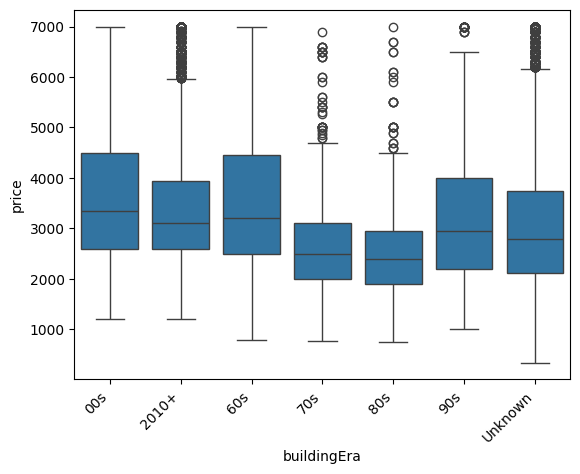

In [71]:
sns.boxplot(x='city', y='price', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

sns.boxplot(x='type', y='price', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

sns.boxplot(x='buildingEra', y='price', data=df, order=sorted(df['buildingEra'].unique()))
plt.xticks(rotation=45, ha='right')
plt.show()

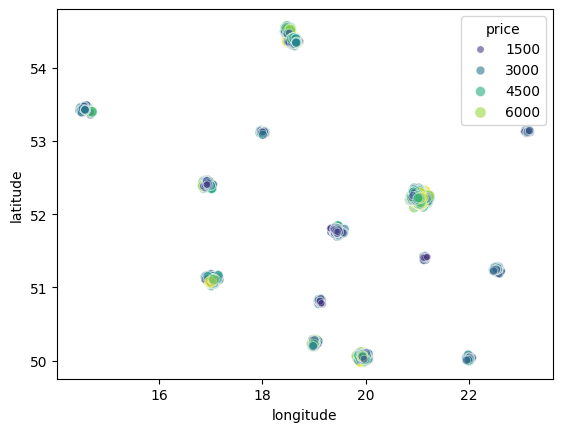

In [72]:
sns.scatterplot(
    x='longitude', 
    y='latitude', 
    hue='price', 
    data=df, 
    palette='viridis', 
    size='price', 
    alpha=0.6
)
plt.show()

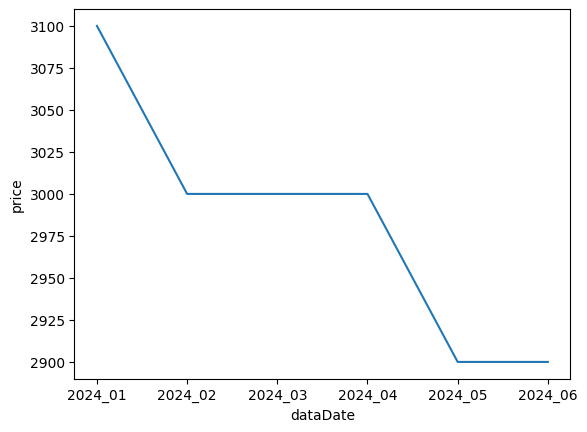

In [73]:
monthly_prices = df.groupby('dataDate')['price'].median().reset_index()
sns.lineplot(x='dataDate',y='price', data=monthly_prices)
plt.show()